In [1]:
from __future__ import absolute_import, division,print_function

from fenics import *

import math
import numpy as np
import logging

import matplotlib.pyplot as plt
%matplotlib inline

dim(Vh)=  289


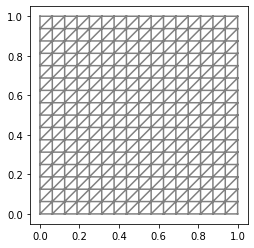

In [2]:
n = 16
degree = 1
mesh = UnitSquareMesh(n,n)
plot(mesh)

Vh = FunctionSpace(mesh, 'Lagrange', degree)
print("dim(Vh)= ", Vh.dim())

In [3]:
class TopBoundary(SubDomain):
    def inside(self , x , on_boundary):
        return on_boundary and abs( x[1]-1) < DOLFIN_EPS
    
class BottomBoundary(SubDomain):
    def inside(self , x , on_boundary):
        return on_boundary and abs( x[1]) < DOLFIN_EPS
    
class LeftBoundary(SubDomain):
    def inside(self , x , on_boundary):
        return on_boundary and abs( x[0]) < DOLFIN_EPS
    
class RightBoundary(SubDomain):
    def inside(self , x , on_boundary):
        return on_boundary and abs( x[0]-1) < DOLFIN_EPS   
    
boundary_parts = MeshFunction("size_t",mesh,1,mesh.domains())
boundary_parts.set_all(0)

Gamma_top = TopBoundary()
Gamma_top.mark(boundary_parts,1)
Gamma_bottom = BottomBoundary()
Gamma_bottom.mark(boundary_parts,2)
Gamma_left = LeftBoundary()
Gamma_left.mark(boundary_parts,3)
Gamma_right = RightBoundary()
Gamma_right.mark(boundary_parts,4)

In [4]:
u_L = Constant(0.)
u_R = Constant(0.)

sigma_bottom = Expression('-(pi/2.0)*sin(2*pi*x[0])',degree=5)
sigma_top =Constant(0.)

f = Expression('(4.0*pi*pi*pi*pi/4.0)*(sin(2*pi*x[0]))*(sin(2*pi*x[0])*x[1])',degree=5)

bcs = [DirichletBC(Vh, u_L, boundary_parts,3),DirichletBC(Vh, u_R, boundary_parts,4)]

ds = Measure("ds",subdomain_data=boundary_parts)

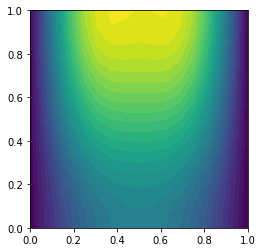

In [5]:
u = TrialFunction(Vh)
v = TestFunction(Vh)
a = inner( nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx + sigma_top*v*ds(1) +sigma_top*v*ds(2)

uh = Function(Vh)

A, b = assemble_system(a,L, bcs = bcs)
solve(A, uh.vector(),b,"cg")

#plt.figure()
#color_map = plt.imshow(uh)
#plt.colorbar()

#plt.imshow(uh)
#plt.colorbar();
plot(uh)